# Examples showcasing GEM EO data collections

This is a notebook showcasing workflow examples for downloading EO imaging data from data collections available through Sentinel Hub.

### Data download examples in this notebook:

1.  Sentinel-2 L1C 
2.  Sentinel-2 L2A 
3.  Sentinel-1 
4.  Sentinel-3 OLCI L1B 
5.  Sentinel-3 SLSTR L1B 
6.  Sentinel-5P L2 
7.  Landsat 1-5 MSS L1 
8.  Landsat 4-5 TM L1 
9.  Landsat 4-5 TM L2 
10. Landsat 7 ETM+ L1 
11. Landsat 7 ETM+ L2
12. Landsat - 8 L1
13. Landsat - 8 L2
14. Digital Elevation Model (DEM) 



In [1]:
%matplotlib inline
import datetime

import matplotlib.pyplot as plt
import numpy as np
from aenum import MultiValueEnum
from eolearn.core import EOPatch, FeatureType
from eolearn.io import SentinelHubDemTask, SentinelHubEvalscriptTask, SentinelHubInputTask, get_available_timestamps
from matplotlib.colors import BoundaryNorm, ListedColormap

from sentinelhub import CRS, BBox, DataCollection, MimeType, SentinelHubRequest, SHConfig

### General parameters

In [2]:
# region of interest
roi_bbox = BBox(bbox=[5.60, 52.68, 5.75, 52.63], crs=CRS.WGS84)
large_bbox = BBox(bbox=[-10.524902, 33.651208, 11.711426, 44.213710], crs=CRS.WGS84)
coast_bbox = BBox(bbox=[-0.05, 40.23, 0.61, 40.63], crs=CRS.WGS84)

### 1. Sentinel-2 L1C data collection ( [Sentinel-2 L1C](https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l1c/) )

In [3]:
s2_l1c_task = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL2_L1C,
    bands=["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B10", "B11", "B12"],
    bands_feature=(FeatureType.DATA, "L1C_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=10,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
    max_threads=3,
)

In [4]:
eopatch_s2_l1c = s2_l1c_task.execute(bbox=roi_bbox, time_interval=["2022-07-03", "2022-07-05"])

In [5]:
eopatch_s2_l1c.timestamp

[datetime.datetime(2022, 7, 4, 10, 56, 28)]

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_s2_l1c.data["L1C_data"][0][..., [3, 2, 1]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False);

### 2. Sentinel-2 L2A data collection ( [Sentinel-2 L2A](https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l2a/) )


In [7]:
s2_l2a_data = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL2_L2A,
    bands=["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12"],
    bands_feature=(FeatureType.DATA, "L2A_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=10,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [8]:
eopatch_s2_l2a = s2_l2a_data.execute(bbox=roi_bbox, time_interval=["2022-07-03", "2022-07-05"])

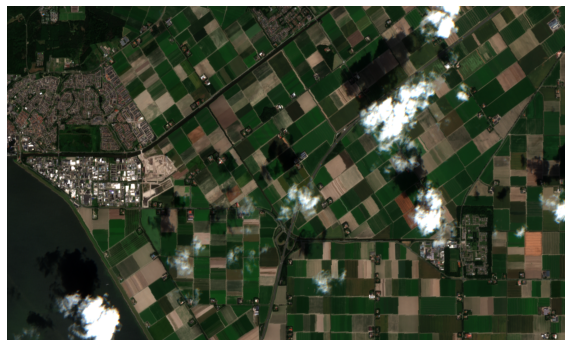

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_s2_l2a.data["L2A_data"][0][..., [3, 2, 1]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False);

### 3. Sentinel-1 data collection ( [Sentinel-1](https://docs.sentinel-hub.com/api/latest/data/sentinel-1-grd/) )


In [10]:
s1_task = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL1_IW_ASC,
    bands=["VV", "VH"],
    bands_feature=(FeatureType.DATA, "S1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=10,
    time_difference=datetime.timedelta(hours=2),
)

In [11]:
s1_bbox = BBox(bbox=[10.48, 45.14, 10.52, 45.16], crs=CRS.WGS84)

eopatch_s1 = s1_task.execute(bbox=s1_bbox, time_interval=["2016-07-12", "2016-07-28"])

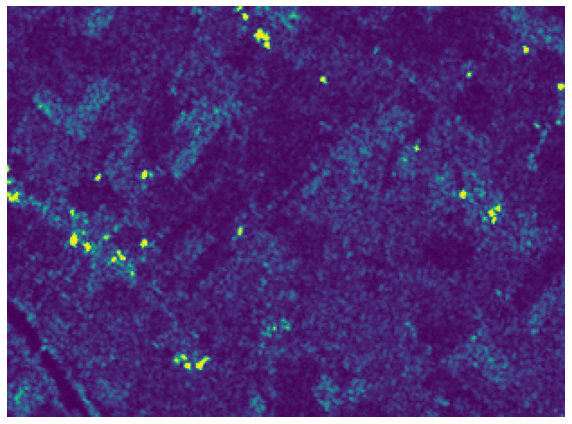

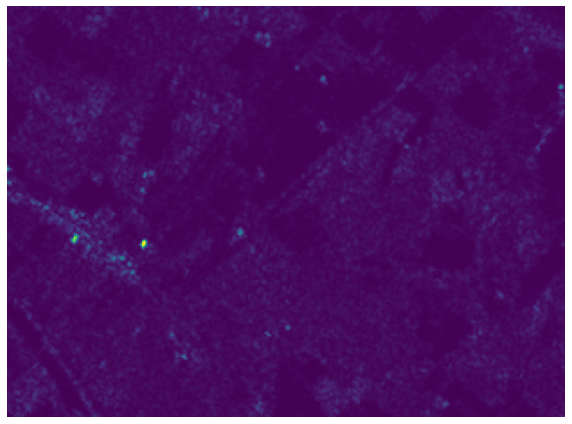

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_s1.data["S1_data"][0][..., [0]], 0, 1), vmin=0, vmax=1)
plt.axis(False)

plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_s1.data["S1_data"][0][..., [1]], 0, 1), vmin=0, vmax=1)
plt.axis(False);

### 4. Sentinel-3 OLCI L1B data collection ( [Sentinel-3 OLCI L1B](https://docs.sentinel-hub.com/api/latest/data/sentinel-3-olci-l1b/) )

In [22]:
s3_olci_task = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL3_OLCI,
    bands=["B02", "B03", "B04", "B05", "B06", "B08", "B19", "B21"],
    bands_feature=(FeatureType.DATA, "S3_OLCI_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=100,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [216]:
eopatch_s3_olci = s3_olci_task.execute(bbox=coast_bbox, time_interval=["2022-07-03", "2022-07-05"])

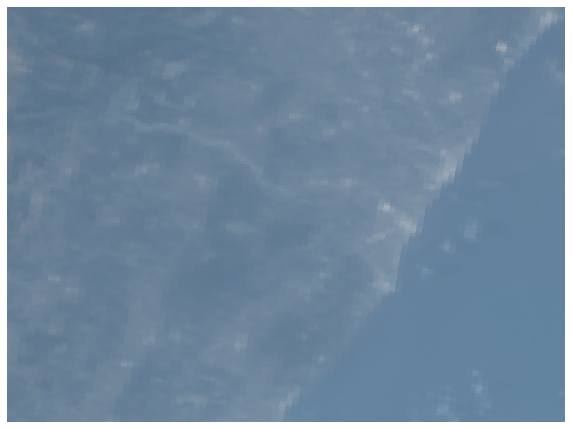

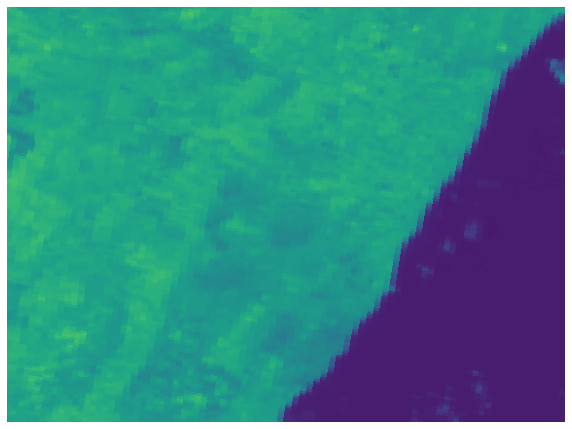

In [217]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_s3_olci.data["S3_OLCI_data"][1][..., [2, 1, 0]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False)

plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_s3_olci.data["S3_OLCI_data"][1][..., [6]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False);

 ### 5. Sentinel-3 SLSTR L1B data collection ( [Sentinel-3 SLSTR L1B](https://docs.sentinel-hub.com/api/latest/data/sentinel-3-slstr-l1b/))

In [209]:
s3_slstr_task = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL3_SLSTR,
    bands=["S6"],
    bands_feature=(FeatureType.DATA, "S3_SLSTR_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=100,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [218]:
eopatch_s3_slstr = s3_slstr_task.execute(bbox=coast_bbox, time_interval=["2022-07-03", "2022-07-05"])

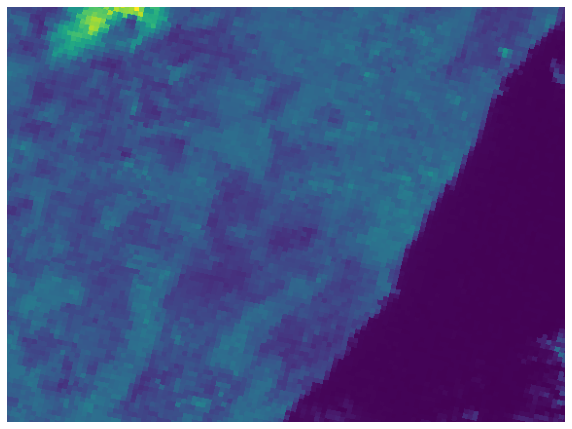

In [219]:
plt.figure(figsize=(10, 10))
plt.imshow(eopatch_s3_slstr.data["S3_SLSTR_data"][0][..., [0]])
plt.axis(False);

### 6. Sentinel-5P L2 data collection ( [Sentinel-5P L2](https://docs.sentinel-hub.com/api/latest/data/sentinel-5p-l2/))

In [212]:
s5p_l2_data = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL5P,
    bands=["CO"],
    bands_feature=(FeatureType.DATA, "CO"),
    resolution=1000,
    time_difference=datetime.timedelta(hours=2),
    aux_request_args={"timeliness": "NRTI"},
)

In [220]:
eopatch_5p_l2 = s5p_l2_data.execute(bbox=large_bbox, time_interval=["2020-07-10", "2020-07-10"])

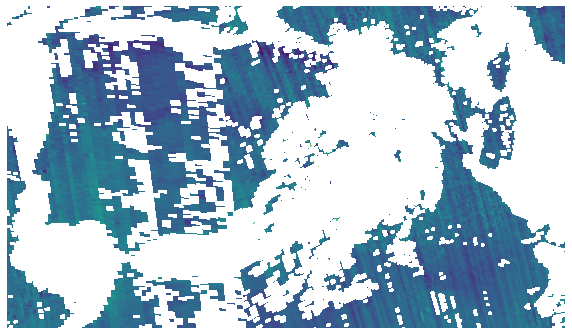

In [221]:
plt.figure(figsize=(10, 10))
plt.imshow(eopatch_5p_l2.data["CO"][1].squeeze())
plt.axis(False);

### 7. Landsat 1-5 MSS L1 data collection ( [Landsat 1-5 MSS L1](https://collections.sentinel-hub.com/landsat-1-5-mss-l1/))

In [222]:
landsat_mssl1_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_MSS_L1,
    bands=["B01", "B02", "B03", "B04"],
    bands_feature=(FeatureType.DATA, "LANDSAT_MSS_L1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=60,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [223]:
eopatch_landsat_mssl1 = landsat_mssl1_task.execute(bbox=coast_bbox, time_interval=["1975-09-10", "1975-09-20"])

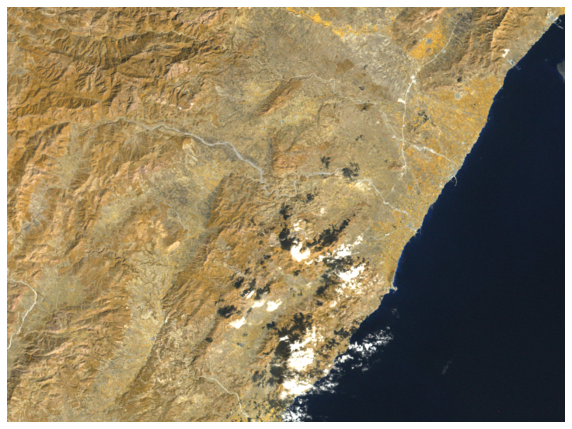

In [224]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_landsat_mssl1.data["LANDSAT_MSS_L1_data"][1][..., [3, 2, 1]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False);

### 8. Landsat 4-5 TM L1 data collection ( [Landsat 4-5 TM L1](https://collections.sentinel-hub.com/landsat-4-5-tm-l1/))

In [88]:
landsat_tml1_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_TM_L1,
    bands=["B01", "B02", "B03", "B04", "B05", "B06", "B07"],
    bands_feature=(FeatureType.DATA, "LANDSAT_TM_L1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [ ]:
eopatch_landsat_tml1 = landsat_tml1_task.execute(bbox=roi_bbox, time_interval=["1985-08-05", "1985-08-10"])

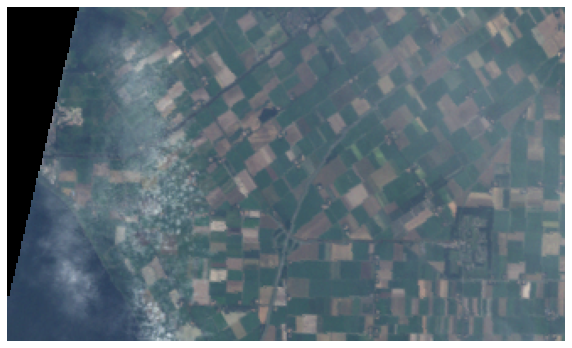

In [107]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_landsat_tml1.data["LANDSAT_TM_L1_data"][0][..., [2, 1, 0]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False);

### 9. Landsat 4-5 TM L2 data collection ( [Landsat 4-5 TM L2](https://collections.sentinel-hub.com/landsat-4-5-tm-l2/))

In [225]:
landsat_tml2_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_TM_L2,
    bands=["B01", "B02", "B03", "B04", "B05", "B06", "B07"],
    bands_feature=(FeatureType.DATA, "LANDSAT_TM_L2_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [226]:
eopatch_landsat_tml2 = landsat_tml2_task.execute(bbox=roi_bbox, time_interval=["1990-07-01", "1990-07-15"])

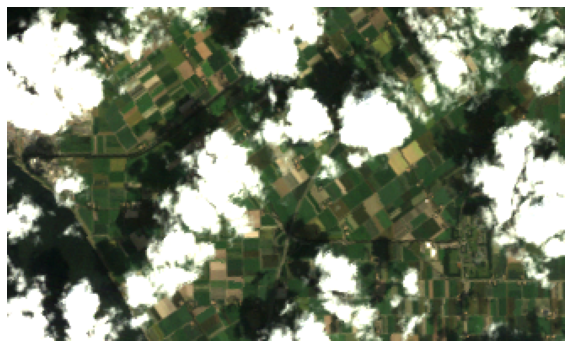

In [227]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_landsat_tml2.data["LANDSAT_TM_L2_data"][0][..., [2, 1, 0]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False);

### 10. Landsat 7 ETM+ L1 data collection ( [Landsat 7 ETM+ L1](https://collections.sentinel-hub.com/landsat-7-etm+-l1/))

In [137]:
landsat_etml1_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_ETM_L1,
    bands=["B01", "B02", "B03", "B04", "B05", "B06_VCID_1"],
    bands_feature=(FeatureType.DATA, "LANDSAT_ETM_L1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [228]:
eopatch_landsat_etml1 = landsat_etml1_task.execute(bbox=roi_bbox, time_interval=["2002-08-10", "2002-08-30"])

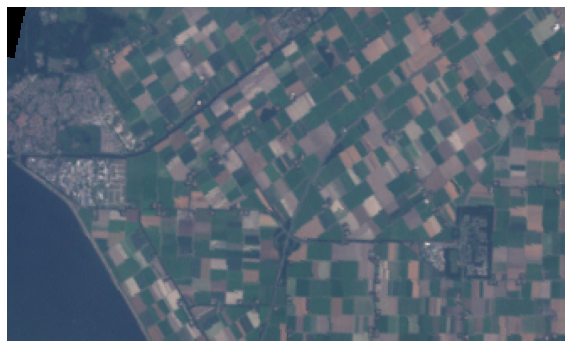

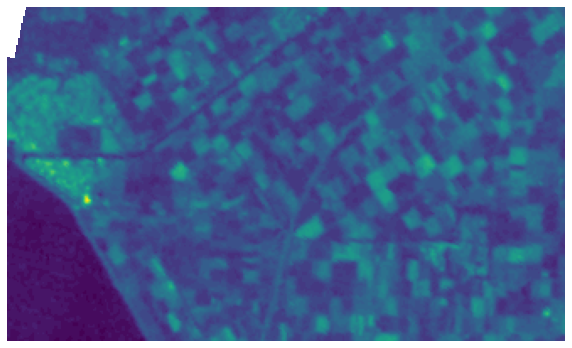

In [229]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_landsat_etml1.data["LANDSAT_ETM_L1_data"][0][..., [2, 1, 0]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False)

plt.figure(figsize=(10, 10))
plt.imshow(eopatch_landsat_etml1.data["LANDSAT_ETM_L1_data"][0][..., [5]])
plt.axis(False);

### 11. Landsat 7 ETM+ L2 data collection ( [Landsat 7 ETM+ L2](https://collections.sentinel-hub.com/landsat-7-etm+-l2/))

In [149]:
landsat_etml2_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_ETM_L2,
    bands=["B01", "B02", "B03", "B04", "B06", "B07"],
    bands_feature=(FeatureType.DATA, "LANDSAT_ETM_L2_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [230]:
eopatch_landsat_etml2 = landsat_etml2_task.execute(bbox=roi_bbox, time_interval=["2002-08-10", "2002-08-30"])

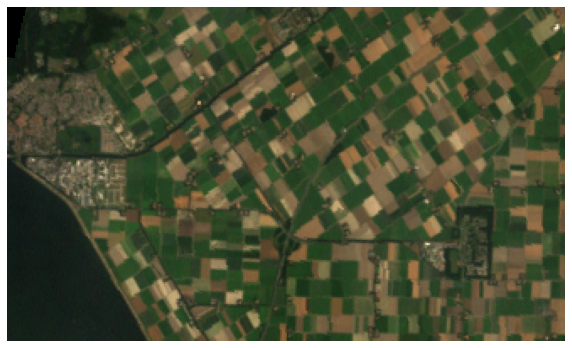

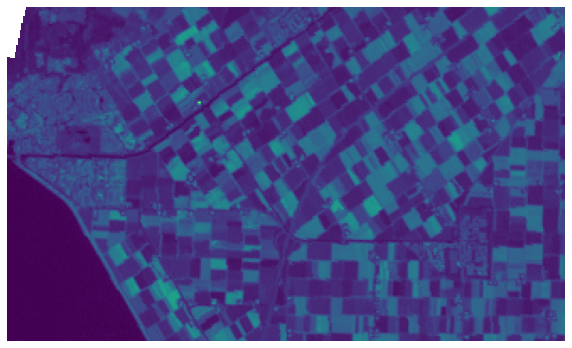

In [231]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_landsat_etml2.data["LANDSAT_ETM_L2_data"][0][..., [2, 1, 0]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False)

plt.figure(figsize=(10, 10))
plt.imshow(eopatch_landsat_etml2.data["LANDSAT_ETM_L2_data"][0][..., [5]])
plt.axis(False);

### 12. Landsat 8-9 OLI-TIRS Level 1  data collection ( [Landsat - 8 L1](https://collections.sentinel-hub.com/landsat-8-l1/))

In [169]:
landsat_otl1_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_OT_L1,
    bands=["B01", "B02", "B03", "B04", "B06", "B10"],
    bands_feature=(FeatureType.DATA, "LANDSAT_OT_L1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [232]:
eopatch_landsat_otl1 = landsat_otl1_task.execute(bbox=roi_bbox, time_interval=["2016-07-10", "2016-07-20"])

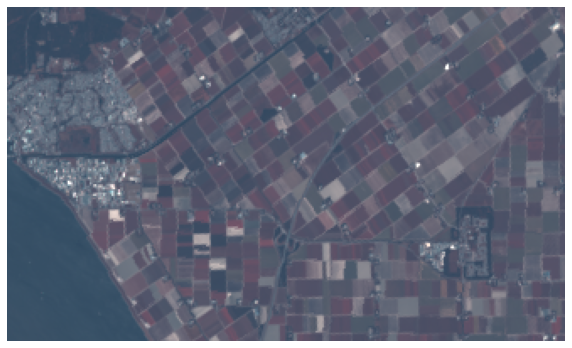

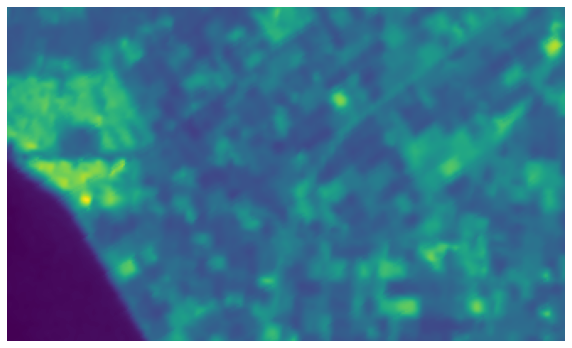

In [233]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_landsat_otl1.data["LANDSAT_OT_L1_data"][0][..., [2, 1, 0]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False)

plt.figure(figsize=(10, 10))
plt.imshow(eopatch_landsat_otl1.data["LANDSAT_OT_L1_data"][0][..., [5]])
plt.axis(False);

### 13. Landsat 8-9 OLI-TIRS Level 2  data collection ( [Landsat - 8 L2](https://collections.sentinel-hub.com/landsat-8-l2/))

In [172]:
landsat_otl2_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_OT_L2,
    bands=["B01", "B02", "B03", "B04", "B05", "B10"],
    bands_feature=(FeatureType.DATA, "LANDSAT_OT_L2_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [234]:
eopatch_landsat_otl2 = landsat_otl2_task.execute(bbox=roi_bbox, time_interval=["2016-07-10", "2016-07-20"])

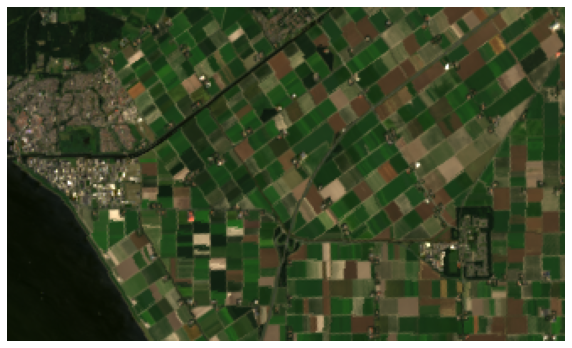

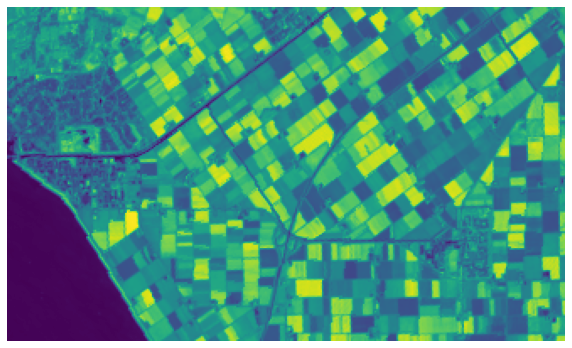

In [174]:
plt.figure(figsize=(10, 10))
plt.imshow(np.clip(eopatch_landsat_otl2.data["LANDSAT_OT_L2_data"][0][..., [3, 2, 1]] * 2.5, 0, 1), vmin=0, vmax=1)
plt.axis(False)

plt.figure(figsize=(10, 10))
plt.imshow(eopatch_landsat_otl2.data["LANDSAT_OT_L2_data"][0][..., [4]])
plt.axis(False);

### 14. Digital Elevation Model ( [Digital Elevation Model](https://docs.sentinel-hub.com/api/latest/data/dem/))

In [235]:
dem_task = SentinelHubDemTask(data_collection=DataCollection.DEM_COPERNICUS_30, resolution=90)

In [236]:
eopatch_dem = dem_task.execute(bbox=coast_bbox)

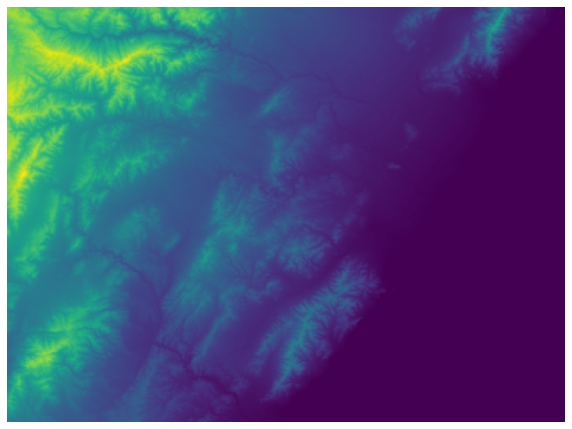

In [237]:
plt.figure(figsize=(10, 10))
plt.imshow(eopatch_dem.data_timeless["dem"].squeeze())
plt.axis(False);